In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap
import seaborn as sns 
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV


In [284]:
col_names = ['times_preg', 'glucose_concentration', 'd_blood_pressure','t_skin_fold','2hr_insulin','BMI','d_pedigree','age','class']
p_ind = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
                   header=None, names=col_names)


In [285]:
p_ind.head()

,times_preg,glucose_concentration,d_blood_pressure,t_skin_fold,2hr_insulin,BMI,d_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [286]:
p_ind = p_ind.replace({'t_skin_fold':{0:np.nan}})
p_ind = p_ind.replace({'BMI':{0:np.nan}})
p_ind = p_ind.replace({'d_blood_pressure':{0:np.nan}})
p_ind = p_ind.replace({'glucose_concentration':{0:np.nan}})

In [287]:
p_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
times_preg               768 non-null int64
glucose_concentration    763 non-null float64
d_blood_pressure         733 non-null float64
t_skin_fold              541 non-null float64
2hr_insulin              768 non-null int64
BMI                      757 non-null float64
d_pedigree               768 non-null float64
age                      768 non-null int64
class                    768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 60.0 KB


In [288]:
p_ind = p_ind.drop('t_skin_fold', axis=1)

In [289]:
p_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
times_preg               768 non-null int64
glucose_concentration    763 non-null float64
d_blood_pressure         733 non-null float64
2hr_insulin              768 non-null int64
BMI                      757 non-null float64
d_pedigree               768 non-null float64
age                      768 non-null int64
class                    768 non-null int64
dtypes: float64(4), int64(4)
memory usage: 54.0 KB


In [290]:
p_ind_clean = p_ind.dropna(axis = 0)

In [291]:
p_ind_clean.describe()

,times_preg,glucose_concentration,d_blood_pressure,2hr_insulin,BMI,d_pedigree,age,class
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [292]:
p_ind_clean.corr()

,times_preg,glucose_concentration,d_blood_pressure,2hr_insulin,BMI,d_pedigree,age,class
times_preg,1.000000,0.134915,0.209668,-0.080059,0.012342,-0.025996,0.557066,0.224417
glucose_concentration,0.134915,1.000000,0.223331,0.337896,0.223276,0.136630,0.263560,0.488384
d_blood_pressure,0.209668,0.223331,1.000000,-0.046856,0.287403,-0.000075,0.324897,0.166703
2hr_insulin,-0.080059,0.337896,-0.046856,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.191831,1.000000,0.154858,0.020835,0.299375
d_pedigree,-0.025996,0.136630,-0.000075,0.182656,0.154858,1.000000,0.023098,0.184947
age,0.557066,0.263560,0.324897,-0.049412,0.020835,0.023098,1.000000,0.245741
class,0.224417,0.488384,0.166703,0.145488,0.299375,0.184947,0.245741,1.000000


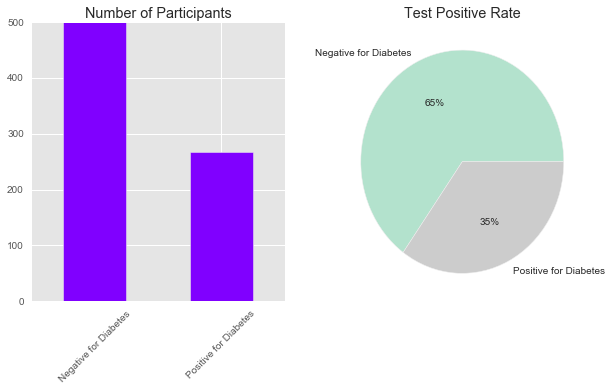

In [293]:
plt.rc('figure', figsize=(10, 5))

# bar chart of test positive
p1 = plt.subplot(1,2,1)
p_ind['class'].map({0:'Negative for Diabetes',1:'Positive for Diabetes'}).value_counts().plot(
    kind='bar',title='Number of Participants',cmap=plt.cm.get_cmap('rainbow'))
p1.set_xticklabels(p1.xaxis.get_majorticklabels(), rotation=45)

# pie chart test potiive
p2 = plt.subplot(1,2,2)
p_ind['class'].value_counts().plot(
    kind='pie', labels=['Negative for Diabetes','Positive for Diabetes'],autopct='%0.0f%%',
    title='Test Positive Rate',cmap=plt.cm.get_cmap('Pastel2'),label='');

In [294]:
# It seems like times pregnant is slightly irrelavent but maybe if it is stardized by age
p_ind2 = p_ind_clean.drop('times_preg', axis=1)
p_ind2["preg_rate"] = p_ind_clean["times_preg"] / (p_ind2["age"]-10)

''

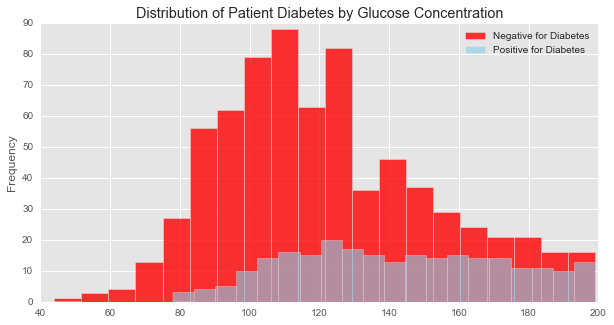

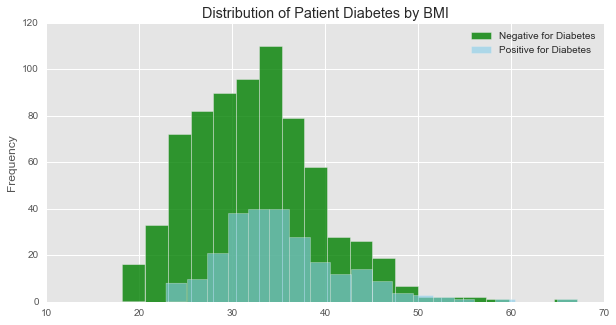

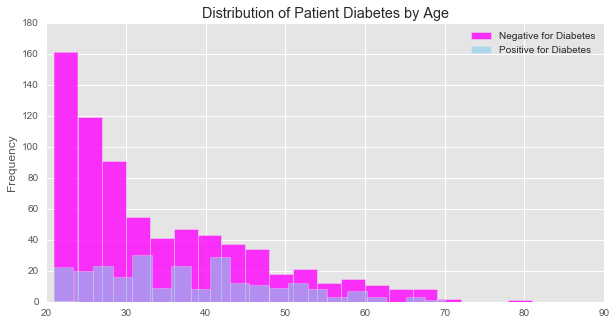

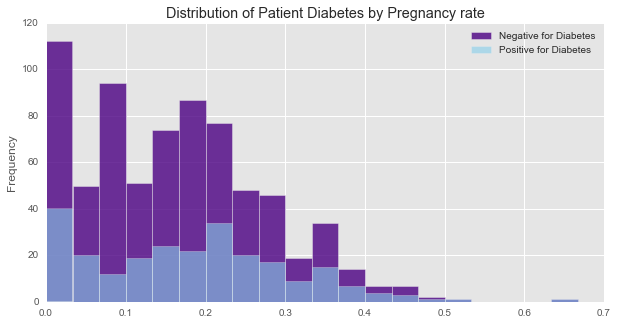

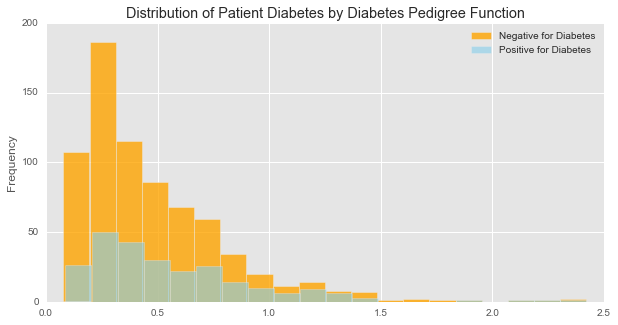

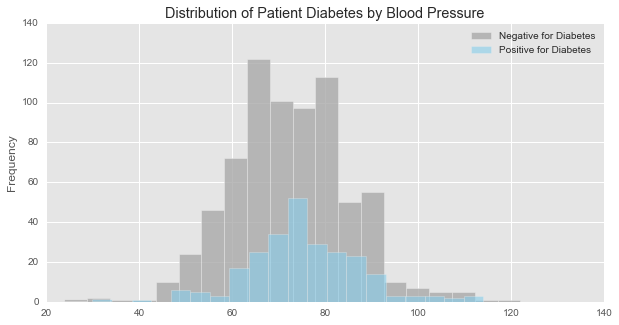

In [295]:
plt.figure(1, figsize=(10, 5));
p_ind2['glucose_concentration'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='red', alpha=0.8,title='Distribution of Patient Diabetes by Glucose Concentration')
p_ind2[p_ind2['class']==1]['glucose_concentration'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')

plt.figure(2, figsize=(10, 5));
p_ind2['BMI'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='green', alpha=0.8,title='Distribution of Patient Diabetes by BMI')
p_ind2[p_ind2['class']==1]['BMI'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')

plt.figure(3, figsize=(10, 5));
p_ind2['age'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='magenta', alpha=0.8,title='Distribution of Patient Diabetes by Age')
p_ind2[p_ind2['class']==1]['age'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')

plt.figure(4, figsize=(10, 5));
p_ind2['preg_rate'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='indigo', alpha=0.8,title='Distribution of Patient Diabetes by Pregnancy rate')
p_ind2[p_ind2['class']==1]['preg_rate'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')

plt.figure(5, figsize=(10, 5));
p_ind2['d_pedigree'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='orange', alpha=0.8,title='Distribution of Patient Diabetes by Diabetes Pedigree Function')
p_ind2[p_ind2['class']==1]['d_pedigree'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')

plt.figure(6, figsize=(10, 5));
p_ind2['d_blood_pressure'].plot(kind='hist', bins=20, label='Negative for Diabetes', color='darkgray', alpha=0.8,title='Distribution of Patient Diabetes by Blood Pressure')
p_ind2[p_ind2['class']==1]['d_blood_pressure'].plot(kind='hist', bins=20, label='Positive for Diabetes', color='skyblue', alpha=0.6)
plt.legend(loc='best')
;

In [296]:
# age seems to not have a factor, though it is very scewed to younger
# even though glucose concentration seems like it would be the bet identifier, BMI might be better looking at the bar graph
# Looks like what we can conclude from the histograms is non of these are TOTALLY irrelevant

In [324]:

p_ind2.describe()

,glucose_concentration,d_blood_pressure,2hr_insulin,BMI,d_pedigree,age,class,preg_rate
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,121.882597,72.400552,84.494475,32.467127,0.474765,33.350829,0.343923,0.158631
std,30.750030,12.379870,117.016513,6.888941,0.332315,11.765393,0.475344,0.113432
min,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000,0.071429
50%,117.000000,72.000000,48.000000,32.400000,0.379000,29.000000,0.000000,0.153846
75%,142.000000,80.000000,130.500000,36.600000,0.627500,41.000000,1.000000,0.230769
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000,0.666667


In [298]:
p_ind2.describe()

,glucose_concentration,d_blood_pressure,2hr_insulin,BMI,d_pedigree,age,class,preg_rate
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,121.882597,72.400552,84.494475,32.467127,0.474765,33.350829,0.343923,0.158631
std,30.750030,12.379870,117.016513,6.888941,0.332315,11.765393,0.475344,0.113432
min,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,0.000000,27.500000,0.245000,24.000000,0.000000,0.071429
50%,117.000000,72.000000,48.000000,32.400000,0.379000,29.000000,0.000000,0.153846
75%,142.000000,80.000000,130.500000,36.600000,0.627500,41.000000,1.000000,0.230769
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000,0.666667


In [299]:
p_ind2['class'].value_counts() / p_ind2.shape[1]

0    59.375
1    31.125
Name: class, dtype: float64

## What model to use
- We want to classify something so probably not lasso/ridge
- Not all features are independant, blood pressure might be related to glucose or BMI etc.- Naive Bayes might not work
- Maybe knn will be best when incorporating interpretability
- Precision vs. recall we want to catch diabetes when there's diabetes


## What do we know about diabetes
- More common with obesity
- Dificulty producing inculin = high blood sugar levels (glucose)


## What do we know about the data set
- All women
- of Pima Indian heritage
- Health aspects were collected on participants related to diabetes such as glucose levels and diabetes pedigree function
- Multivariate
- Classification
- Values are type Int and Float
- 8 Attributes 
- 768 participants

In [300]:
# Dummy 
dr = DummyRegressor()
y, X = p_ind2['class'], p_ind2.drop(['class'], axis=1)


In [301]:
dr.fit(X,y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [302]:
from sklearn.cross_validation import cross_val_score
cross_val_score(dr, X, y, cv=10)

array([ -2.29609904e-02,  -1.06371204e-02,  -5.83843650e-02,
        -8.08305210e-04,  -5.92275592e-05,  -5.08110956e-03,
        -1.75892235e-01,  -2.68909400e-02,  -3.39846062e-03,
        -1.77561606e-02])

In [325]:
y, X = p_ind2['class'], p_ind2.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

## KNN

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.grid_search import GridSearchCV
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(579, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [305]:
clf.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'distance'}

In [306]:
best_knn = clf.best_estimator_

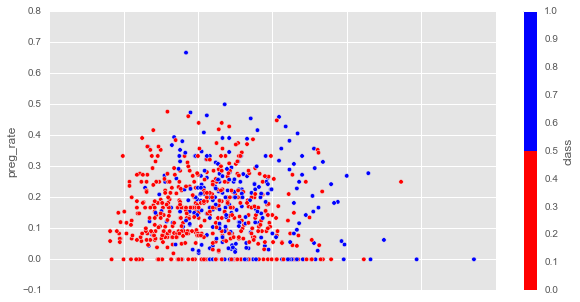

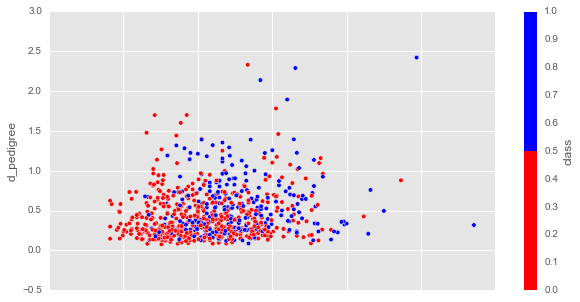

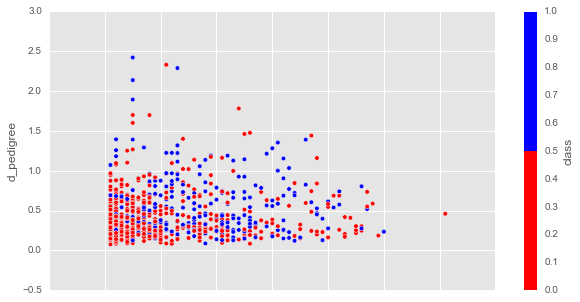

In [370]:
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
p_ind2.plot(kind='scatter', x='BMI', y='preg_rate', c='class', colormap=cmap_bold)
plt.xlabel("h")

p_ind2.plot(kind='scatter', x='BMI', y='d_pedigree', c='class', colormap=cmap_bold)

p_ind2.plot(kind='scatter', x='age', y='d_pedigree', c='class', colormap=cmap_bold)

In [308]:
best_knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='distance')

In [371]:
#best_knn.predict_proba(X_test_std)

In [310]:
from sk_modelcurves.learning_curve import draw_learning_curve


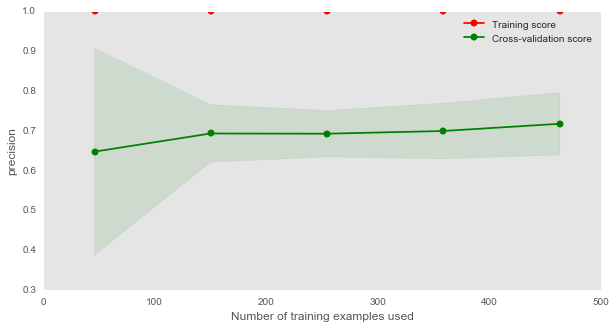

In [311]:
draw_learning_curve(best_knn, X_train_std, y_train, scoring='precision', cv=cv);

In [372]:
best_knn.score(X_test_std, y_test)


0.80689655172413788

In [313]:
# NOT GOOD! OVER FITTING!
# Either I have done this very wrong, or knn is not a good predictor at all for this. 

# I would have assumed that these health attributes of a given patient who tested potitive for diebetes would
#"look" similar 
# to another positive test but maybe it's more complicated than that

# if you view the scatter plots it makes sense that knn would not be ideal since all the pioints are all
# over the place. 


## Naive Bayes

In [314]:
from sklearn.naive_bayes import MultinomialNB
parameters = {'alpha': np.linspace(1e-4, 1, 10)}
nbayes = MultinomialNB()
clf = GridSearchCV(nbayes, parameters, cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(579, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.11200e-01,   2.22300e-01,   3.33400e-01,
         4.44500e-01,   5.55600e-01,   6.66700e-01,   7.77800e-01,
         8.88900e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [315]:
clf.best_params_


{'alpha': 0.0001}

In [316]:
clf.best_score_

0.58362068965517244

In [317]:
best_nb = clf.best_estimator_


In [318]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    
    plt.figure() #telling it it's a plot
    plt.title(title) # the title is called title
    if ylim is not None: # when the limit is 0 it's irrelevant and we want to avoid plotting
        plt.ylim(*ylim) #plot y lim, what's 
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

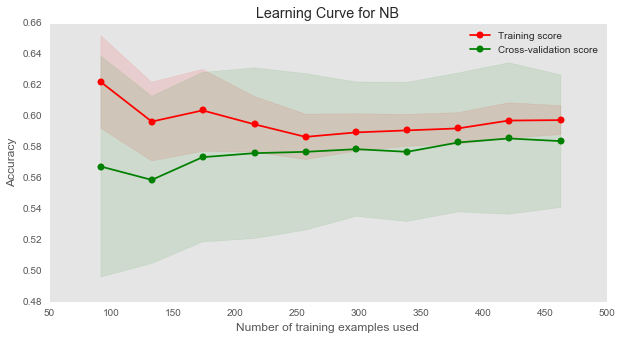

In [319]:
plot_learning_curve(best_nb, 'Learning Curve for NB', X_train, y_train, cv=cv);

In [320]:
#VERY HIGH BIAS 
# Each of these attributes are measurements of one single person 
# How could they be totally independent?

## Logistic Regression

l2 RIDGE

In [323]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)
import numpy as np
from sklearn.grid_search import GridSearchCV
# gridsearch for hyperparameters
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(579, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [322]:
logreg.fit(X_train_std, y_train)
zip(col_names, logreg.coef_[0])

[('times_preg', 1.1015788324634417),
 ('glucose_concentration', -0.14963520141980408),
 ('d_blood_pressure', -0.12124262208507716),
 ('t_skin_fold', 0.67808036937701088),
 ('2hr_insulin', 0.32486610088461171),
 ('BMI', 0.45827287442363135),
 ('d_pedigree', 0.32857765090874808)]

In [327]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': None}

In [328]:
clf.best_score_

0.77758620689655178

In [329]:
best_log = clf.best_estimator_
best_log.fit(X_train_std, y_train)

LogisticRegression(C=1010.1010199999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [330]:
best_log.score(X_train_std, y_train)

0.7754749568221071

In [337]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

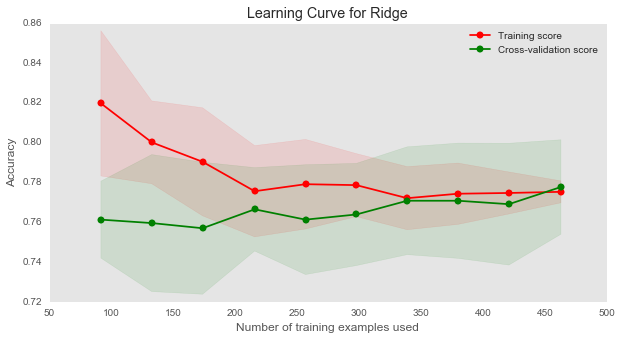

In [338]:
plot_learning_curve(best_log, 'Learning Curve for Ridge', X_train, y_train, cv=cv);

l1 Lasso

In [342]:
logreg = LogisticRegression(penalty='l1', C=10)
import numpy as np
from sklearn.grid_search import GridSearchCV
# gridsearch for hyperparameters
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(579, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [343]:
logreg.fit(X_train_std, y_train)
zip(col_names, logreg.coef_[0])


[('times_preg', 1.100820315672203),
 ('glucose_concentration', -0.14789604042921883),
 ('d_blood_pressure', -0.11996974196254846),
 ('t_skin_fold', 0.67674580625452085),
 ('2hr_insulin', 0.32385258834672231),
 ('BMI', 0.45722044862850608),
 ('d_pedigree', 0.32774635038831529)]

In [334]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': None}

In [335]:
clf.best_score_

0.77758620689655178

In [339]:
# Lasso Performs slightly higher which makee sense because not all features are relevant. 

In [344]:
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

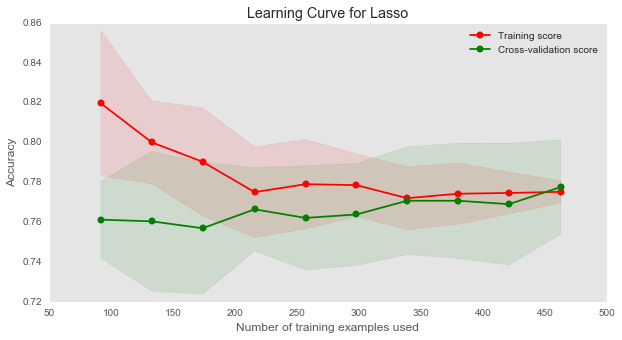

In [345]:
plot_learning_curve(best_log, 'Learning Curve for Lasso', X_train, y_train, cv=cv);

In [368]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(X, y)

cross_val_score(dr, X, y, cv=cv)

array([-0.00322571, -0.00621489, -0.00119355, -0.01013866, -0.00325892,
       -0.0011371 , -0.00621489, -0.00322571, -0.01497894, -0.01101229])

## Random Forrests

In [357]:
y, X = p_ind2['class'], p_ind2.drop(['class'], axis=1)

In [358]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [360]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,glucose_concentration,0.283033
3,BMI,0.156964
5,age,0.149539
4,d_pedigree,0.137697
6,preg_rate,0.103446
2,2hr_insulin,0.086933
1,d_blood_pressure,0.082389


In [353]:
y, X = p_ind_clean['class'], p_ind_clean.drop(['class'], axis=1)

In [354]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [355]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
1,glucose_concentration,0.277492
4,BMI,0.176035
6,age,0.156010
5,d_pedigree,0.133346
2,d_blood_pressure,0.086395
3,2hr_insulin,0.086011
0,times_preg,0.084711


In [361]:
# above is checking importance of times_preg vs preg rate, looks like it's value increas slightly

In [362]:
y, X = p_ind2['class'], p_ind2.drop(['class'], axis=1)

In [363]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,glucose_concentration,0.289317
3,BMI,0.157113
5,age,0.149201
4,d_pedigree,0.132899
6,preg_rate,0.102903
1,d_blood_pressure,0.091809
2,2hr_insulin,0.076759


In [364]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

CV accuracy [ 0.73966942  0.76763485  0.7593361 ], Average accuracy 0.755546791948
CV accuracy [ 0.71487603  0.67634855  0.6846473 ], Average accuracy 0.69195729456
CV accuracy [ 0.7107438   0.73858921  0.75103734], Average accuracy 0.73345678589
CV accuracy [ 0.73966942  0.76763485  0.80082988], Average accuracy 0.769378050593
CV accuracy [ 0.72727273  0.73443983  0.78008299], Average accuracy 0.74726518295
CV accuracy [ 0.76446281  0.77593361  0.78423237], Average accuracy 0.774876261674
CV accuracy [ 0.7768595   0.76348548  0.80497925], Average accuracy 0.781774744808
CV accuracy [ 0.76859504  0.77178423  0.80082988], Average accuracy 0.780403049735
CV accuracy [ 0.75206612  0.76348548  0.79253112], Average accuracy 0.769360904404
CV accuracy [ 0.72727273  0.77593361  0.7966805 ], Average accuracy 0.766628945052
CV accuracy [ 0.73966942  0.76763485  0.78008299], Average accuracy 0.76246242127


## What model would I use
- I think I would use all of these, probably not naive bayes because I know some of these attributes are related but otherwise, I don't currently understand enough about diabetes to choose a model and what you learn from a few of them is more valuable than just choosing one.
- If I had to choose I'd pick Random Forest because it's the best with handling all the differnt features that may be completely irrelavant. Maybe I'd do random forest from the beginning for feature importance and then do multiple models with logistic regrassion with different pairs of variables. 
